<a href="https://colab.research.google.com/github/HWatanuki/Ocean_DeepLearning/blob/main/Explorando_o_Visualiza%C3%A7%C3%B5es_com_o_Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# seaborn: statistical data visualization

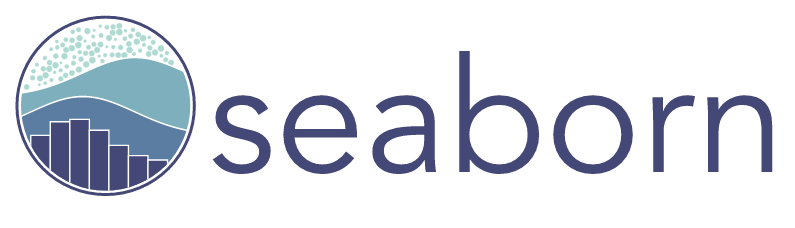

- Seaborn é um biblioteca Python para visualização de dados, baseada no matplotlib. 
- Ela provê uma interface de alto nível para desenhar informações estatístcas de forma atrativa.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#importando o seaborn
import seaborn as sns



## Palmer Penguins

Esse dataset contém 344 pinguins, de 3 espécies diferentes, observados em três ilhas do arquipélago Palmer, na Antar*a.

Informações:
- species: Espécie.
- island: Ilha que foi observado.
- bill_length_mm: Comprimento do bico, em mm.
- bill_depth_mm: Profundidade do bico, em mm.
- flipper_length_mm:  Comprimento da nadadeira, em mm.
- body_mass_g: Massa corporal, em gramas.
- sex: Sexo



In [ ]:
pinguins = pd.read_csv('https://raw.githubusercontent.com/ftorresd/OCEAN-datasets/main/penguins/penguins.csv')

In [ ]:
pinguins

In [ ]:
pinguins.info()

In [ ]:
pinguins.describe()

**Estilo**

In [ ]:
# REF: https://seaborn.pydata.org/tutorial/aesthetics.html
sns.set_style("whitegrid") 

#### **Count Plot e Bar Plot**

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(x="species", data=pinguins);


In [ ]:
buffer = pinguins.groupby(['island'])['body_mass_g'].sum()
buffer = buffer.reset_index()
buffer

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x="island", y="body_mass_g", data=buffer)
plt.xticks(rotation=90);

#### **Paleta de Cores**

Documentação: http://seaborn.pydata.org/tutorial/color_palettes.html

In [ ]:
sns.color_palette("light:b")

In [ ]:
sns.color_palette("tab10")

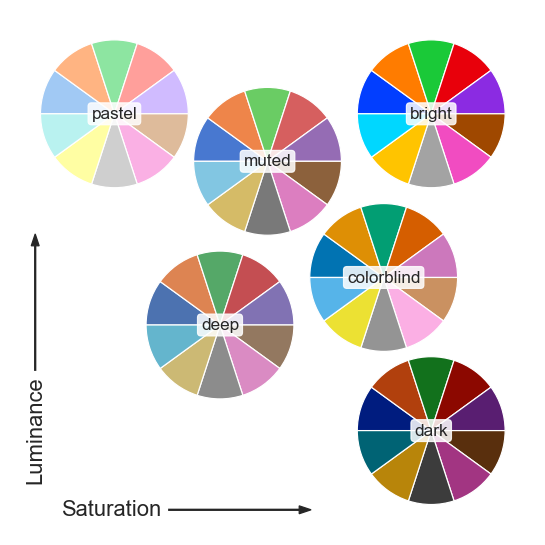

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x="island", y="body_mass_g", data=buffer, palette=sns.color_palette("dark:salmon_r"))
plt.xticks(rotation=90);

#### **Relacionamento**

In [ ]:
plt.figure(figsize=(12, 8))
sns.relplot(x="flipper_length_mm", y="body_mass_g", data=pinguins);

In [ ]:
sns.relplot(x="flipper_length_mm", y="body_mass_g", data=pinguins, hue="island", size="bill_length_mm", palette='muted', height=7);

####  **Joint Plot**

In [ ]:
# kind : { "scatter" | "kde" | "hist" | "hex" | "reg" | "resid" }
g = sns.jointplot(data=pinguins, x="body_mass_g", y="flipper_length_mm", hue="species", kind='kde');
g.savefig('teste.png', dpi=300)

#### Desafio

Qual é o plot de relacionamento, ou joint plot, que mais diferencia as três espécies?

#### Resposta

```python
sns.jointplot(data=pinguins, x="bill_length_mm", y="flipper_length_mm", hue="species", kind='scatter');
```

#### **Pair Plot**

In [ ]:
plt.figure(figsize=(12, 8))
sns.pairplot(pinguins, hue="island");

#### **Heatmap**

Preparando os dados.

In [ ]:
buffer = pinguins.pivot_table(index='species', columns='island', values='flipper_length_mm', aggfunc='mean')
buffer

Em um heatmap, a mesma variável é avaliada para diferentes combinações de categorias.

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(data=buffer, annot=True, linewidths=.5, cmap=sns.color_palette('light:b', as_cmap=True) );

#### **KDE Plot (Densidade estimada)**

Em um gráfico de densidade, quanto mais próximas as linhas, mais densa é a região, ou seja, mais entradas (linha no dataset) existem.

In [ ]:
plt.figure(figsize=(12, 8))
sns.kdeplot(
    data=pinguins[pinguins['species'] != 'Adelie'],
    x="flipper_length_mm",
    y="body_mass_g",
    hue="species",
    thresh=.1);

#### **Box Plot**

Em estatística descritiva, diagrama de caixa, diagrama de extremos e quartis, boxplot ou box plot é uma ferramenta gráfica para representar a variação de dados observados de uma variável numérica por meio de quartis. 

O box plot tem uma reta (whisker ou fio de bigode) que estende–se verticalmente ou horizontalmente a partir da caixa, indicando a variabilidade fora do quartil superior e do quartil inferior.

Os valores atípicos ou outliers (valores discrepantes) podem ser plotados como pontos individuais.


In [ ]:
fig = plt.figure(figsize=(12, 8))
ax = plt.axes()

# sns.set_theme(style="ticks", palette="pastel")

sns.boxplot(x="species", y="body_mass_g",
            hue="island", palette=["m", "g", "r"],
            data=pinguins);

# sns.despine(offset=10, trim=True);

# import matplotlib.ticker as plticker
# ax.yaxis.set_major_locator(plticker.MultipleLocator(base=100))

In [ ]:
(pinguins[pinguins['species'] == 'Gentoo']).describe()

#### Regressão (Linear)

In [ ]:
# order (int): If order is greater than 1, use numpy.polyfit to estimate a polynomial regression.

sns.lmplot(x="body_mass_g", y="flipper_length_mm", data=pinguins, order=3);